<a href="https://colab.research.google.com/github/ArchanaSooraj/COVID-19-World-Vaccination-Progress-Report/blob/main/COVID_19_World_Vaccination_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Archana S**

**Post Graduate Certification in Data Analytics**

**Edu Bridge**

**october 1th, 2021**



# **AN OVERVIEW OF WORLD COVID-19 VACCINATIONS PROGRESS**

**Introduction**

At the moment, I guess almost everyone in this world has heard at least once about COVID-19. It has been nearly two years since the world recorded the first case of COVID-19. Fortunately, we have produced several types of vaccines against the pandemic. If you regurlarly update daily news, you must see and hear about COVID-19 statistics. In case you are wondering how people work with it, then this notebook is suitable for you. In this notebook, I mainly focus on analyzing information that related to the vaccinations progress. We will go through step by step to reach the final result.

**Context**

Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded. Country level vaccination data is gathered and assembled in one single file. Then, this data file is merged with locations data file to include vaccination sources information. A second file, with manufacturers information, is included.

**Column Content**

The data (covid19 - country vaccinations progress) contains the following
information:

Country- this is the country for which the vaccination information is provided;

Country ISO Code - ISO code for the country;

Date - date for the data entry; for some of the dates we have only the daily
vaccinations, for others, only the (cumulative) total;

Total number of vaccinations - this is the absolute number of total immunizations in the country;

Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;

Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;

Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;

Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;

Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;

Number of vaccinations per day - number of daily vaccination for that day and country;

Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;

Vaccines used in the country - total number of vaccines used in the country (up to date);

Source name - source of the information (national authority, international organization, local organization etc.);

Source website - website of the source of information;

There is a second file added recently (country vaccinations by manufacturer), with the following columns:

Location - country;

Date - date;

Vaccine - vaccine type;

Total number of vaccinations - total number of vaccinations / current time and vaccine type.


#**Exploratory Data Analysis(EDA):**

 Let's analyze the global country vaccinations data progress. Here, we have the following questions to answer:

1.What are the top 5 biggest and smallest countries with vaccinations progress ?

2.What is the global average vaccinations by month ?

3.What vaccine is most common and least used ?

4.People vaccinated per hundred Country.

5.What are the top 5 countries that are having the highest and lowest of fully vaccinated people per population ?

6.Which country is vaccinating its citizens the fastest?

7.What are the different categories of vaccines offered?

8.Percentage of use of different types of vaccines.

9.Total Vaccinations per country grouped by Vaccines.

10.People vaccinated per country, grouped by vaccine scheme.

11.Daily COVID-19 vaccine doses administered per million people.

12.How many people daily vaccinated in India?

13.How many people take at least one dose of vaccine in India?

14 .How many people total fully vaccinated in India?

In [2]:
!pip3 install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 40.6 MB/s eta 0:00:00


In [3]:
!pip install plotly==5.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [1]:
import plotly

plotly.__version__

'5.3.1'

**1.1. Import librabries:**

In [2]:
# Import librabries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.stats import pearsonr
from pywaffle import Waffle
warnings.filterwarnings("ignore")

**1.2. Reading files:**

In [3]:
#Read the country_vaccinations dataset
df = pd.read_csv("/content/country_vaccinations.csv")
# Read the country_vaccinations_by_manufacturer dataset
df1 = pd.read_csv("/content/country_vaccinations_by_manufacturer.csv")

In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
df.shape

(86512, 15)

In [6]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [9]:
df.groupby('country').count()

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Afghanistan,394,394,46,43,36,3,393,46,43,36,393,394,394,394
Albania,439,439,248,195,185,172,438,248,195,185,438,439,439,439
Algeria,405,405,24,24,20,3,404,24,24,20,404,405,405,405
Andorra,413,413,42,37,31,2,412,42,37,31,412,413,413,413
Angola,390,390,64,62,54,0,389,64,62,54,389,390,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wales,443,443,438,438,438,436,442,438,438,438,442,443,443,443
Wallis and Futuna,371,371,40,39,34,0,370,40,39,34,370,371,371,371
Yemen,312,312,22,22,15,0,311,22,22,15,311,312,312,312


**Handling Missing Data**

In [10]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

#### **As can be seen, there is quite much missing data.**
#### **drop total vaccinations missing data, as without this value any raw doesn't make much sense.**

In [11]:
df = df.drop(df[df.total_vaccinations.isna()].index)
df = df.drop(df[df.people_vaccinated.isna()].index)
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3454
daily_vaccinations_raw                 7635
daily_vaccinations                      207
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3454
daily_vaccinations_per_million          207
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

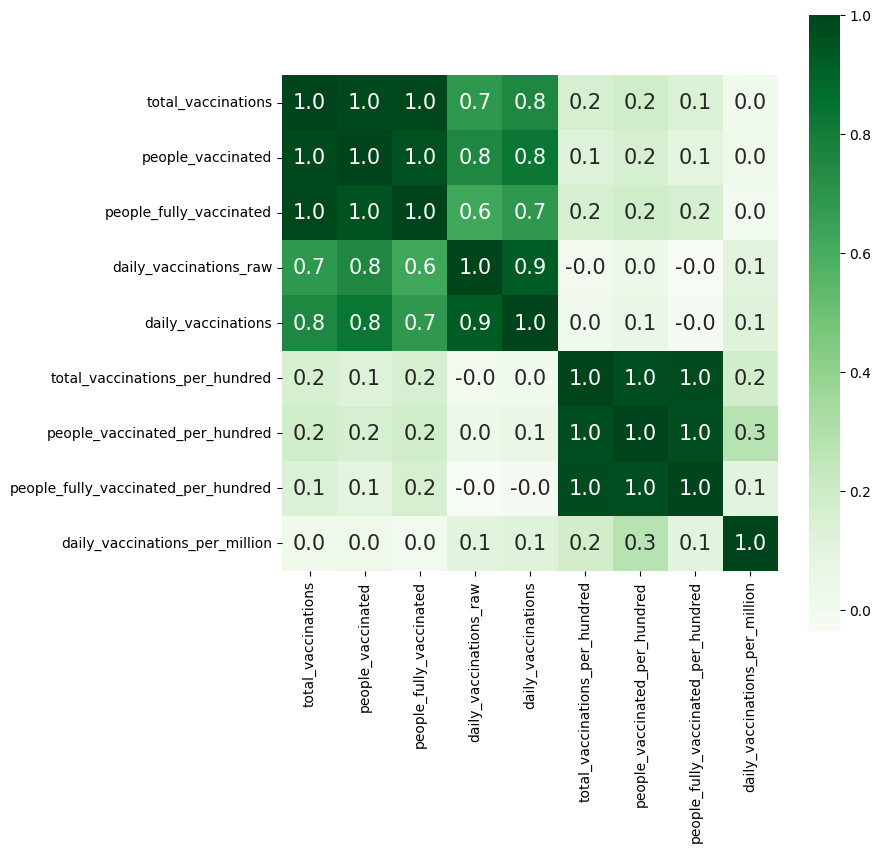

In [12]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

As can bee seen from our data, the values of total vaccinations column are mostly the same as people vaccenated columns and total vaccinations per hundred and people vaccinated per hundred are also very similar.
As can bee seen from the heatmap, these features have almost ideal correlation.
Ok, So, we will fill the missing values with the difference of these column's mean values.

In [13]:
difference = df.total_vaccinations.mean() - df.people_vaccinated.mean()
difference_per_hundred = df.total_vaccinations_per_hundred.mean() - df.people_vaccinated_per_hundred.mean()

df.people_vaccinated = df.people_vaccinated.fillna(df.total_vaccinations - difference)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(df.total_vaccinations_per_hundred - difference_per_hundred)

In [14]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3454
daily_vaccinations_raw                 7635
daily_vaccinations                      207
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3454
daily_vaccinations_per_million          207
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [15]:
df.shape

(40890, 15)

**for other feature just fill missing values with zeros**

In [16]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [17]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [18]:
df.shape

(40890, 15)

#### **The problem of missing values was solved!**
----

###**Explore the min and max of fully vacnated people.**

In [ ]:
df.people_fully_vaccinated.min()

0.0

In [ ]:
df.people_fully_vaccinated.max()

1022207000.0

**Explore the min and max date.**

In [ ]:
df.date.min()

'2020-12-01'

In [ ]:
df.date.max()

'2021-09-20'

**Explore The Number of daily vaccinations dynamic**

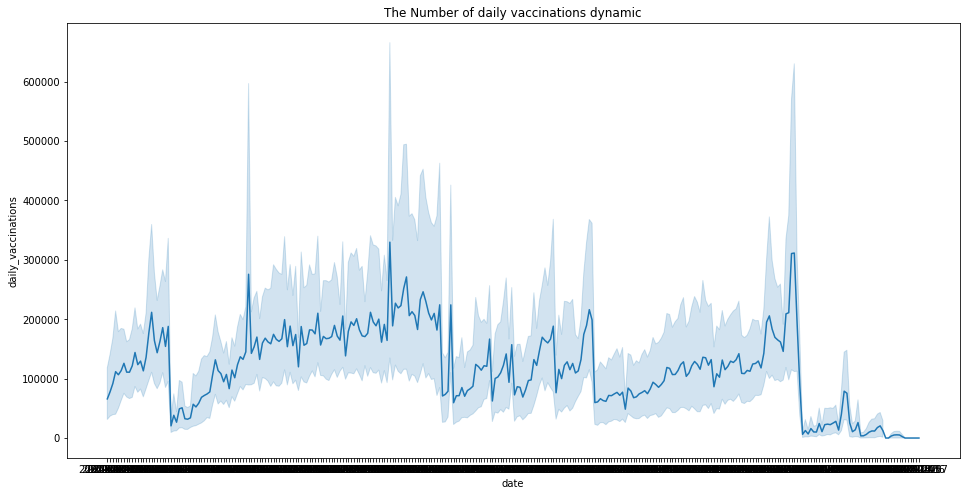

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.date, y=df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

**Explore the Vaccination procedure go on rapidly from which date.**

In [ ]:
countries = df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['country'] == country])

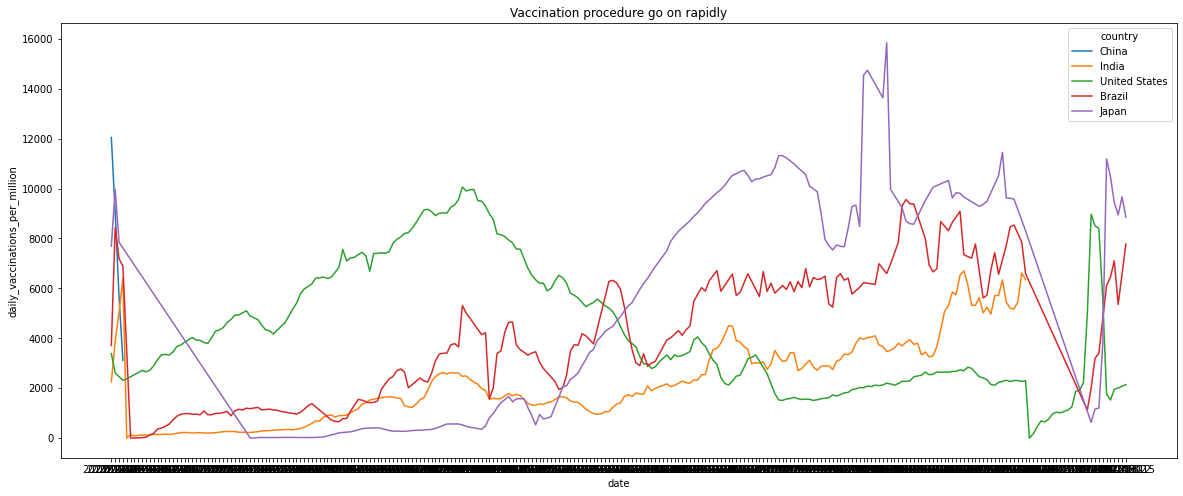

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], top_countries['daily_vaccinations_per_million'], hue= top_countries['country'], ci= False)
plt.title('Vaccination procedure go on rapidly');
plt.show()


###**Cleaning and finding Missing values in the second file**

In [19]:
df1.head(5)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [20]:
df1.shape

(35623, 4)

In [21]:
df1.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [22]:
df1.describe()

,total_vaccinations
count,3.562300e+04
mean,1.508357e+07
std,5.181768e+07
min,0.000000e+00
25%,9.777600e+04
50%,1.305506e+06
75%,7.932423e+06
max,6.005200e+08


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [24]:
df1.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

Fantastic!! no null values

# **Visualization**

In [25]:
df2 = df.copy()

df2.rename(columns={'country':'Country',
                          'iso_code':'IsoCode',
                          'date':'Date',
                          'total_vaccinations': 'TotalVaccinations',
                          'people_vaccinated': 'PeopleVaccinated',
                          'people_fully_vaccinated': 'PeopleFullyVaccinated',
                          'daily_vaccinations_raw': 'DailyVaccinationsRaw',
                          'daily_vaccinations': 'DailyVaccinations',
                          'total_vaccinations_per_hundred': 'TotalVaccinationsPerHundred',
                          'people_vaccinated_per_hundred':'PeopleVaccinatedPerHundred',
                          'people_fully_vaccinated_per_hundred': 'PeopleFullyVaccinatedPerHundred',
                          'daily_vaccinations_per_million': 'DailyVaccinationsPerMillion',
                          'vaccines':'Vaccines',
                          'source_name':'SourceName',
                          'source_website':'SourceWebsite'}, inplace=True)

**1.What are the top 5 biggest and smallest countries with vaccinations progress ?**

Here, I tried to find 5 countries with highest number of vaccinations. Since I saw that in total_vaccinations columns, the values are cummulative. Therefore, instead of using sum function, I used max function to take the lastest value. You can alsop use sum function but in this case, the column you work with is the daily_vaccinations.

In [26]:
#Five Highest Countries
total = df2.groupby('Country')['TotalVaccinations'].max().reset_index()
fhc = total.sort_values('TotalVaccinations', ascending=False).head(5)
pd.set_option('display.float_format', lambda x: '%.0f'% x)
fhc

,Country,TotalVaccinations
41,China,3243599000
91,India,1834500657
212,United States,560181791
27,Brazil,413559595
92,Indonesia,377108938


Here, you can see that China, known as the first country that the COVID-19 pandemic occurred has the highest number of total vaccinations. Nearly 2.174 billions vaccine doses were used. It is reasonable because China has faced the pandemic for 2 years and they population is the highest in the world. The next 3 positions are for India, United States and Brazil. It is expected because these 3 countries have the highest number of cases.

In [27]:
fig = px.bar(fhc,
             x='Country',
             y='TotalVaccinations',
             labels = {'Country' : 'country', 'TotalVaccinations' : 'total_vaccinations'},
             title = "Top 5 Countries With Biggest Vaccinations Progress",
             color=['black', 'red', 'green', 'blue', 'cyan']
            )
fig.show()

Thanks to the graph, it is obviously that China is dominating in the number of vaccine used.

**What are the top 5 smallest countries with vaccinations progress ?**

Similarly, I try to find the top 5 countries with the least vaccinations progress. In this case, I do not put the asceding command.

In [28]:
# Top 5 smallest countries with vaccinations progress
flc = total.sort_values('TotalVaccinations', ascending=False).tail(5)
flc

,Country,TotalVaccinations
67,Falkland Islands,4407
132,Montserrat,4211
145,Niue,4161
200,Tokelau,1936
158,Pitcairn,94




It is weird to see that there is a country with only 94 in total vaccinations. By searching for this country, I figured out that Pitcairn is an islands whose sorvereign state is United Kingdom and in 2021, it is estimated that the population here is only approximately 50 residents.

In [29]:
fig = px.bar(flc,
             x='Country',
             y='TotalVaccinations',
             labels = {'country' : 'Country', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Top 5 Countries With Lowest Vaccinations Progress",
             color=['black', 'red', 'green', 'blue', 'cyan']
            )
fig.show()

**2.What is the global average vaccinations by month ?**

Now let's check the progress of vaccinations through months to see wheter the progress is increasing or not. Here, I calculated the mean of the global daily vaccinations under the reference of month to have the overview.

In [30]:
# Find the global average total vaccinations by month
df2['Date'] = pd.to_datetime(df2['Date'])
avg = df2.groupby(df2['Date'].dt.strftime('%B'))['DailyVaccinations'].mean().sort_values().reset_index()
avg

,Date,DailyVaccinations
0,March,104247
1,May,117007
2,April,123468
3,February,125829
4,June,160682
5,January,163906
6,July,171324
7,August,199172
8,November,199389
9,October,199559


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(avg, *['DailyVaccinations'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(avg, *['DailyVaccinations'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(avg, *['Date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(avg, *['DailyVaccinations', 'count()', None], **{})
chart

In [31]:
# Lineplot to see the full progress
fig = px.line(avg,
             x='Date',
             y='DailyVaccinations',
             labels = {'DailyVaccinations' : 'Global Monthly Vaccinations', 'Date' : 'Month'},
             title = "Average Total Vaccinations"
            )
fig.show()

It is obviously that the world is doing good when the line is gradually increasing except that there is a slight drop in april, it may be because the appearance Delta mutation at that time so it decelerated the progress. Note that from August to september, there is a sudden climb. It can be explained that there is not enough data for september in the dataset. Therefore,the value of september is not objective.

So far, it is quite enough to have a basic view of the current status. Now, let's take a quick look at the popularity of the present vaccines.

**3.What vaccine is most common used and least common used ?**

Let's explore the popularity of vaccines by summing their total up. In this case, like the total_vaccinations column in the country_vaccinations dataset, the value in the total_vaccinations in country_vaccinations_by_manufacturers are cummulative. Therefore, I used max function to take out the lastest value of each vaccine.

In [32]:
# Call out the number of total vaccines used by country and vaccine types
vpc = df1.groupby(['vaccine', 'location'])['total_vaccinations'].max().reset_index()
vpc


,vaccine,location,total_vaccinations
0,CanSino,Argentina,610540
1,CanSino,Chile,574442
2,CanSino,Ecuador,536882
3,Covaxin,European Union,11
4,Covaxin,Portugal,11
...,...,...,...
189,Sinovac,Uruguay,3247932
190,Sputnik V,Argentina,20405678
191,Sputnik V,European Union,1845103
192,Sputnik V,Hungary,1807392


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(vpc, *['total_vaccinations'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(vpc, *['total_vaccinations'], **{})
chart

In [33]:
# Rank the popularity of vaccines
vr = vpc.groupby('vaccine')['total_vaccinations'].sum().reset_index()
vr = vr.sort_values('total_vaccinations', ascending=False)
vr

,vaccine,total_vaccinations
6,Pfizer/BioNTech,1830468893
3,Moderna,558181628
5,Oxford/AstraZeneca,207101555
7,Sinopharm/Beijing,72810196
2,Johnson&Johnson,68837424
8,Sinovac,60528625
9,Sputnik V,24095884
0,CanSino,1721864
4,Novavax,422365
1,Covaxin,22


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(vr, *['total_vaccinations'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(vr, *['total_vaccinations'], **{})
chart

In [34]:
# Pieplot
fig = px.pie(vr, values='total_vaccinations', names='vaccine', title='Vaccines Occupancy' )
fig.show()

This pie chart illustrates the real domination of Pfizer/BioNTech. What a vaccine!



In [35]:
# Barplot
fig = px.bar(vr,
             y='total_vaccinations',
             x='vaccine',
             labels = {'vaccine' : 'Vaccines', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Overview of Vaccines"
            )
fig.update_yaxes(type="log")
fig.show()


Since one country may uses several types of vaccines. I decided to make a pivot table to look at the total number of vaccines they have used so far.

There are only 38 countries mentioned in the dataset. However, it is enough to figure out that Pfizer/BioNTech and Moderna are the leaders in this race. While, the two vaccines made by Chinese (CanSino, Sinopharm/Beijing) look unpopular.

In [36]:
# Creat pivot table
pvt = pd.pivot_table(data = df1, index = ['location'], columns = ['vaccine'], values = 'total_vaccinations', aggfunc = 'max')
pvt.fillna(0) # Fill null values by 0 to have a better view of the table

vaccine,CanSino,Covaxin,Johnson&Johnson,Moderna,Novavax,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
location,,,,,,,,,,
Argentina,610540,0,0,6507561,0,25977231,14681054,28322602,0,20405678
Austria,0,0,363548,1585063,3682,1588222,14584985,0,0,0
Belgium,0,0,425639,4267394,36,2846716,17451842,0,0,0
Bulgaria,0,0,511702,491663,0,478541,2852218,0,0,0
Chile,574442,0,0,0,0,549396,7910264,0,25596927,0
Croatia,0,0,201126,508787,220,567900,3921503,0,0,0
Cyprus,0,0,30003,186468,45,254527,1188656,0,0,0
Czechia,0,0,412627,1584930,3046,887126,14604323,0,0,0
Denmark,0,0,46934,1708672,0,155689,10259219,0,0,0




It can be seen that Pfizer/BioNTech is used by all of the listed countries and its biggest consumer is undoubtedly, their origin country, the Uninted States with more than 193.5 millions doses used. While CanSino and Sinopharm/Beijing are only used by one country, Chile and Hungary respectively.

**4.Country wise People vaccinated per hundred**

In [37]:
c_peopleHundred = df2.groupby('Country')['PeopleVaccinatedPerHundred'].max().reset_index()
c = c_peopleHundred.sort_values('PeopleVaccinatedPerHundred', ascending=False).head(5)
c

,Country,PeopleVaccinatedPerHundred
77,Gibraltar,125
145,Niue,102
158,Pitcairn,100
210,United Arab Emirates,99
160,Portugal,95


In [38]:
fig= px.bar(c,
            x='Country' ,
            y='PeopleVaccinatedPerHundred',
            hover_data=['Country','PeopleVaccinatedPerHundred'],
            color='PeopleVaccinatedPerHundred',
            labels={'PeopleVaccinatedPerHundred':'PeopleVaccinatedPerHundred'},
            height=400)
fig.show()


Here

**5.What are the top 5 countries that are having the highest and lowest of fully vaccinated people per hundred ?**


**5 countries that are having the highest vaccinated people per hundred**

In [39]:
pc = df2.groupby('Country')['PeopleFullyVaccinatedPerHundred'].max().sort_values(ascending=False).head(5)
pc.reset_index()

,Country,PeopleFullyVaccinatedPerHundred
0,Gibraltar,122
1,Pitcairn,100
2,United Arab Emirates,96
3,Portugal,93
4,Brunei,92


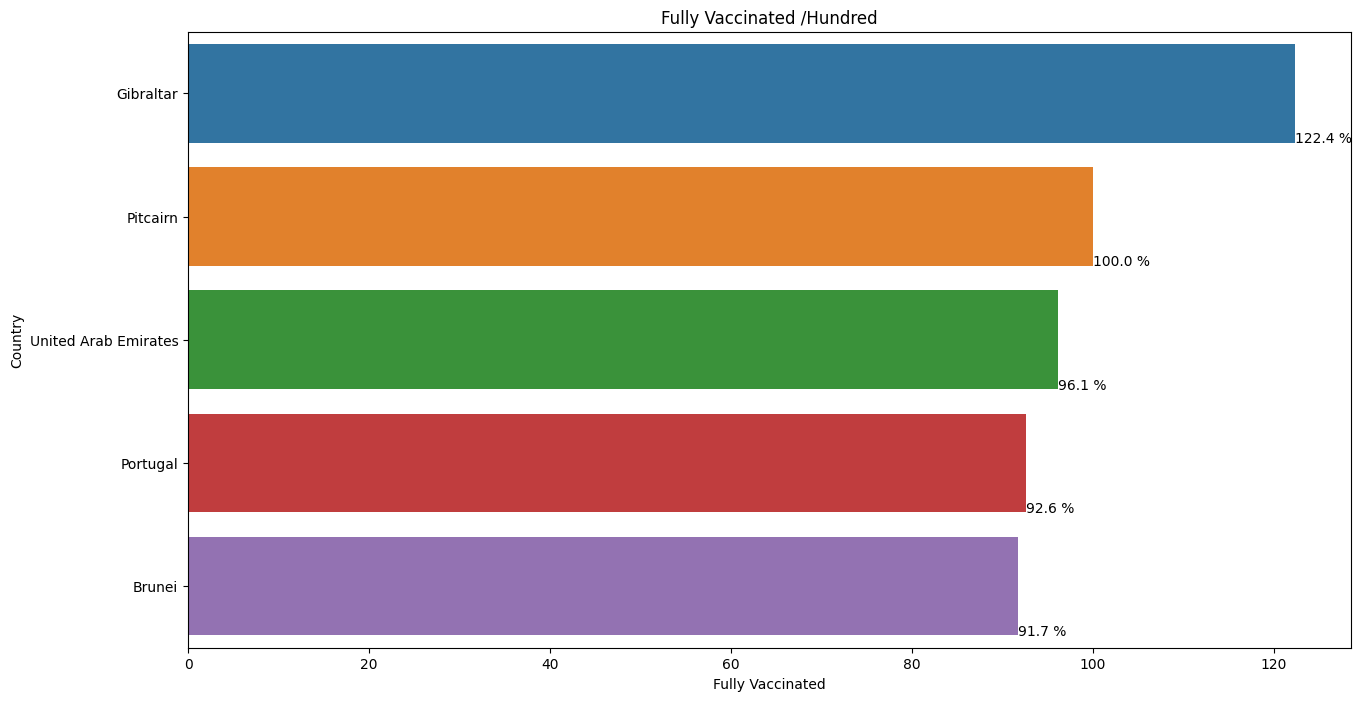

In [40]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=pc, y=pc.index)
plt.title('Fully Vaccinated /Hundred')
plt.xlabel('Fully Vaccinated')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()

    plt.text(width + x, height + y, '{:.1f} %'.format(width))

In [41]:

spc = df2.groupby('Country')['PeopleFullyVaccinatedPerHundred'].min().sort_values(ascending=False).head(5)
spc.reset_index()

,Country,PeopleFullyVaccinatedPerHundred
0,Sint Maarten (Dutch part),23
1,Qatar,19
2,Monaco,18
3,Northern Cyprus,12
4,Aruba,9


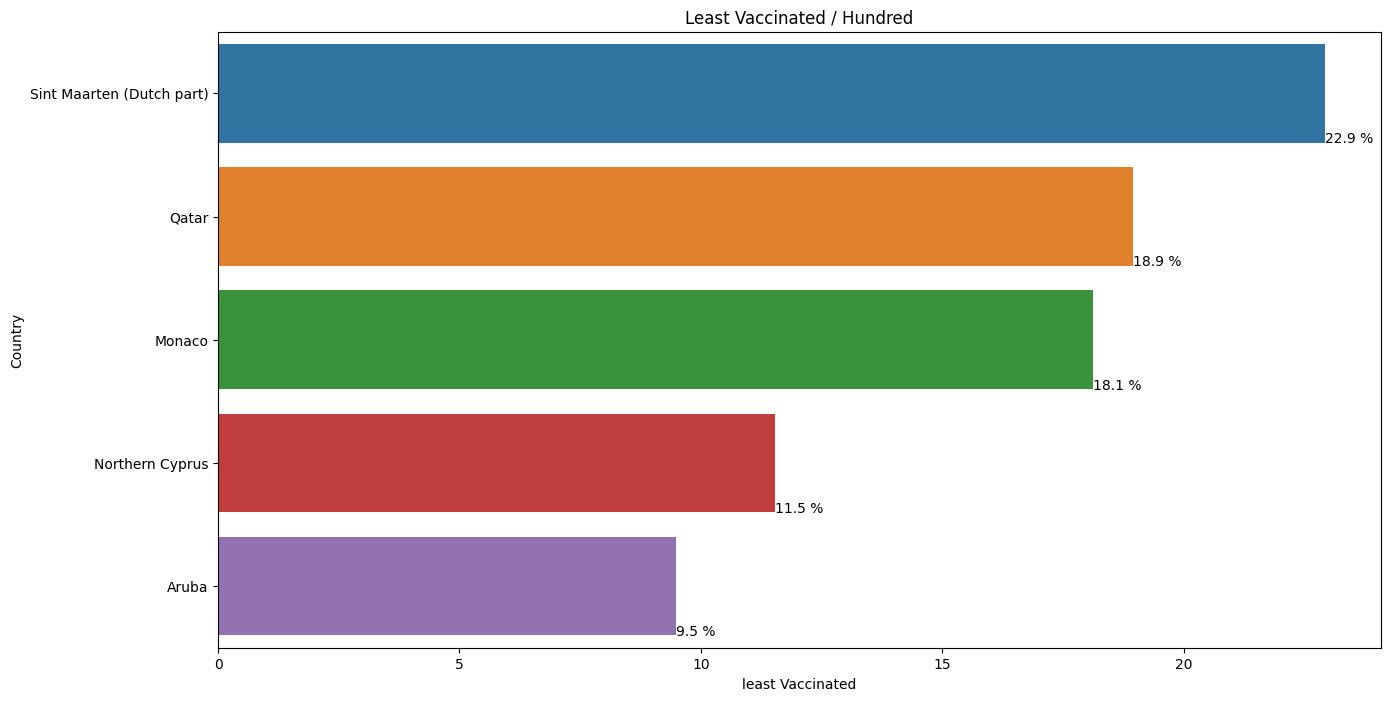

In [42]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=spc, y=spc.index)
plt.title('Least Vaccinated / Hundred')
plt.xlabel('least Vaccinated')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()

    plt.text(width + x, height + y, '{:.1f} %'.format(width))

**6.Which country is vaccinating its citizens the fastest?**

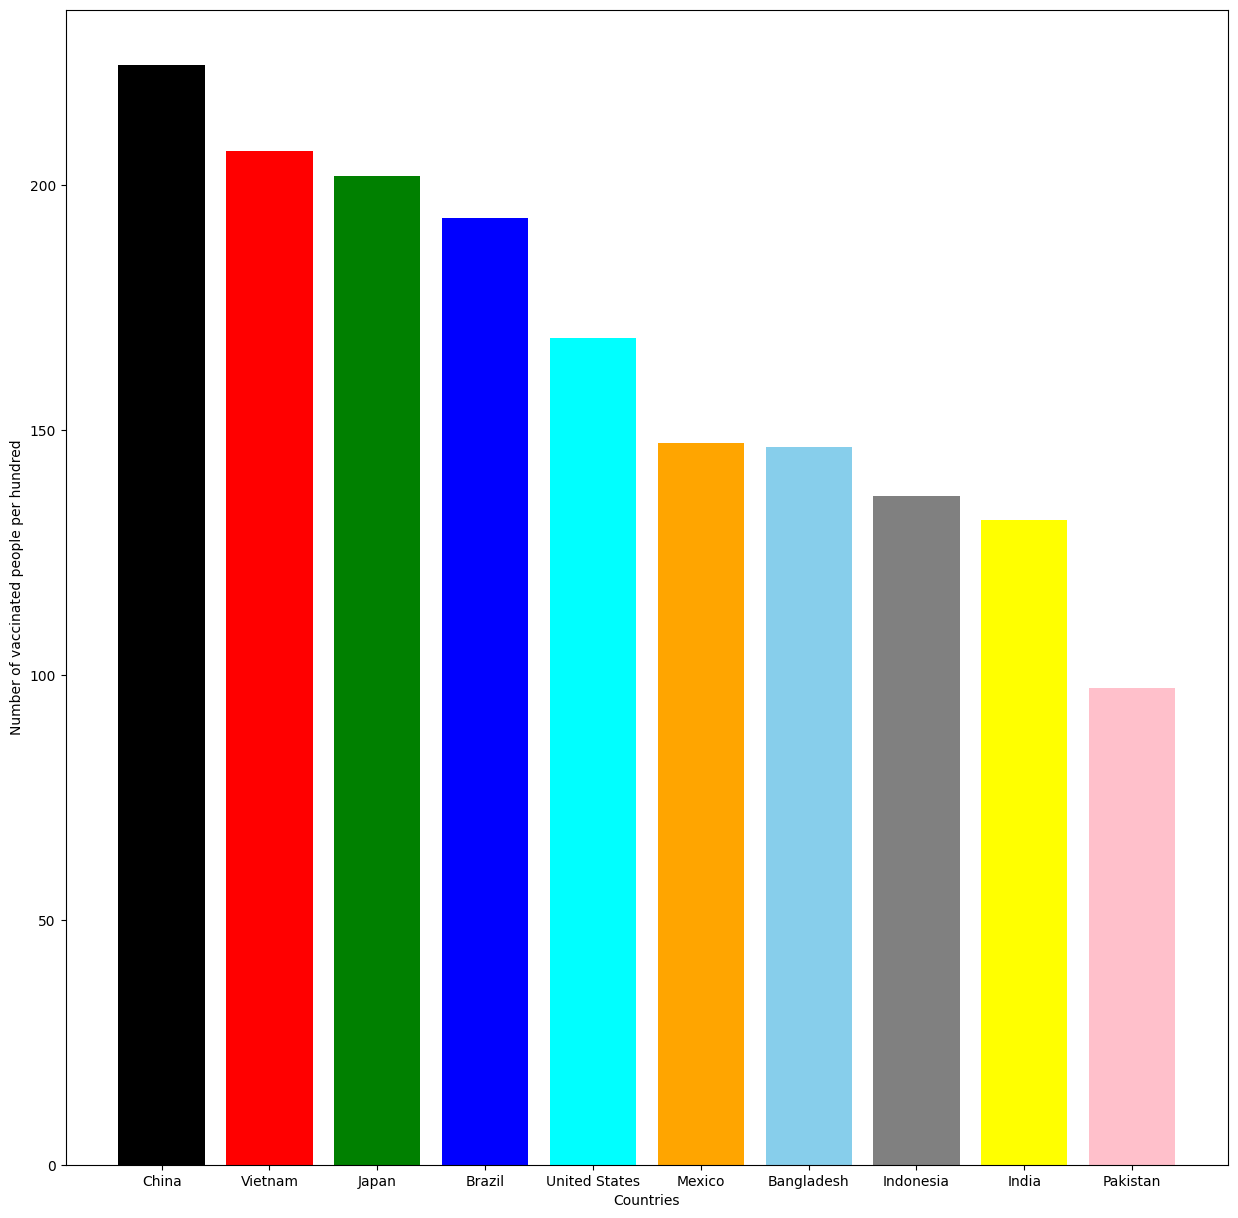

In [43]:
cols = ['Country', 'TotalVaccinations', 'IsoCode', 'Vaccines','TotalVaccinationsPerHundred']

vacc_amount = df2[cols].groupby('Country').max().sort_values('TotalVaccinations', ascending=False).dropna(subset=['TotalVaccinations'])
vacc_amount = vacc_amount.iloc[:10]

vacc_amount = vacc_amount.sort_values('TotalVaccinationsPerHundred', ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(vacc_amount.index, vacc_amount.TotalVaccinationsPerHundred ,color=['black', 'red', 'green', 'blue', 'cyan','orange', 'skyblue', 'gray', 'yellow', 'pink'])

plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

Here we can say that china is the first position for its citizens are taken the fastest vaccination. and next three position are covered by uk, Germany, Turkey.


 **7.What are the different categories of vaccines offered?**

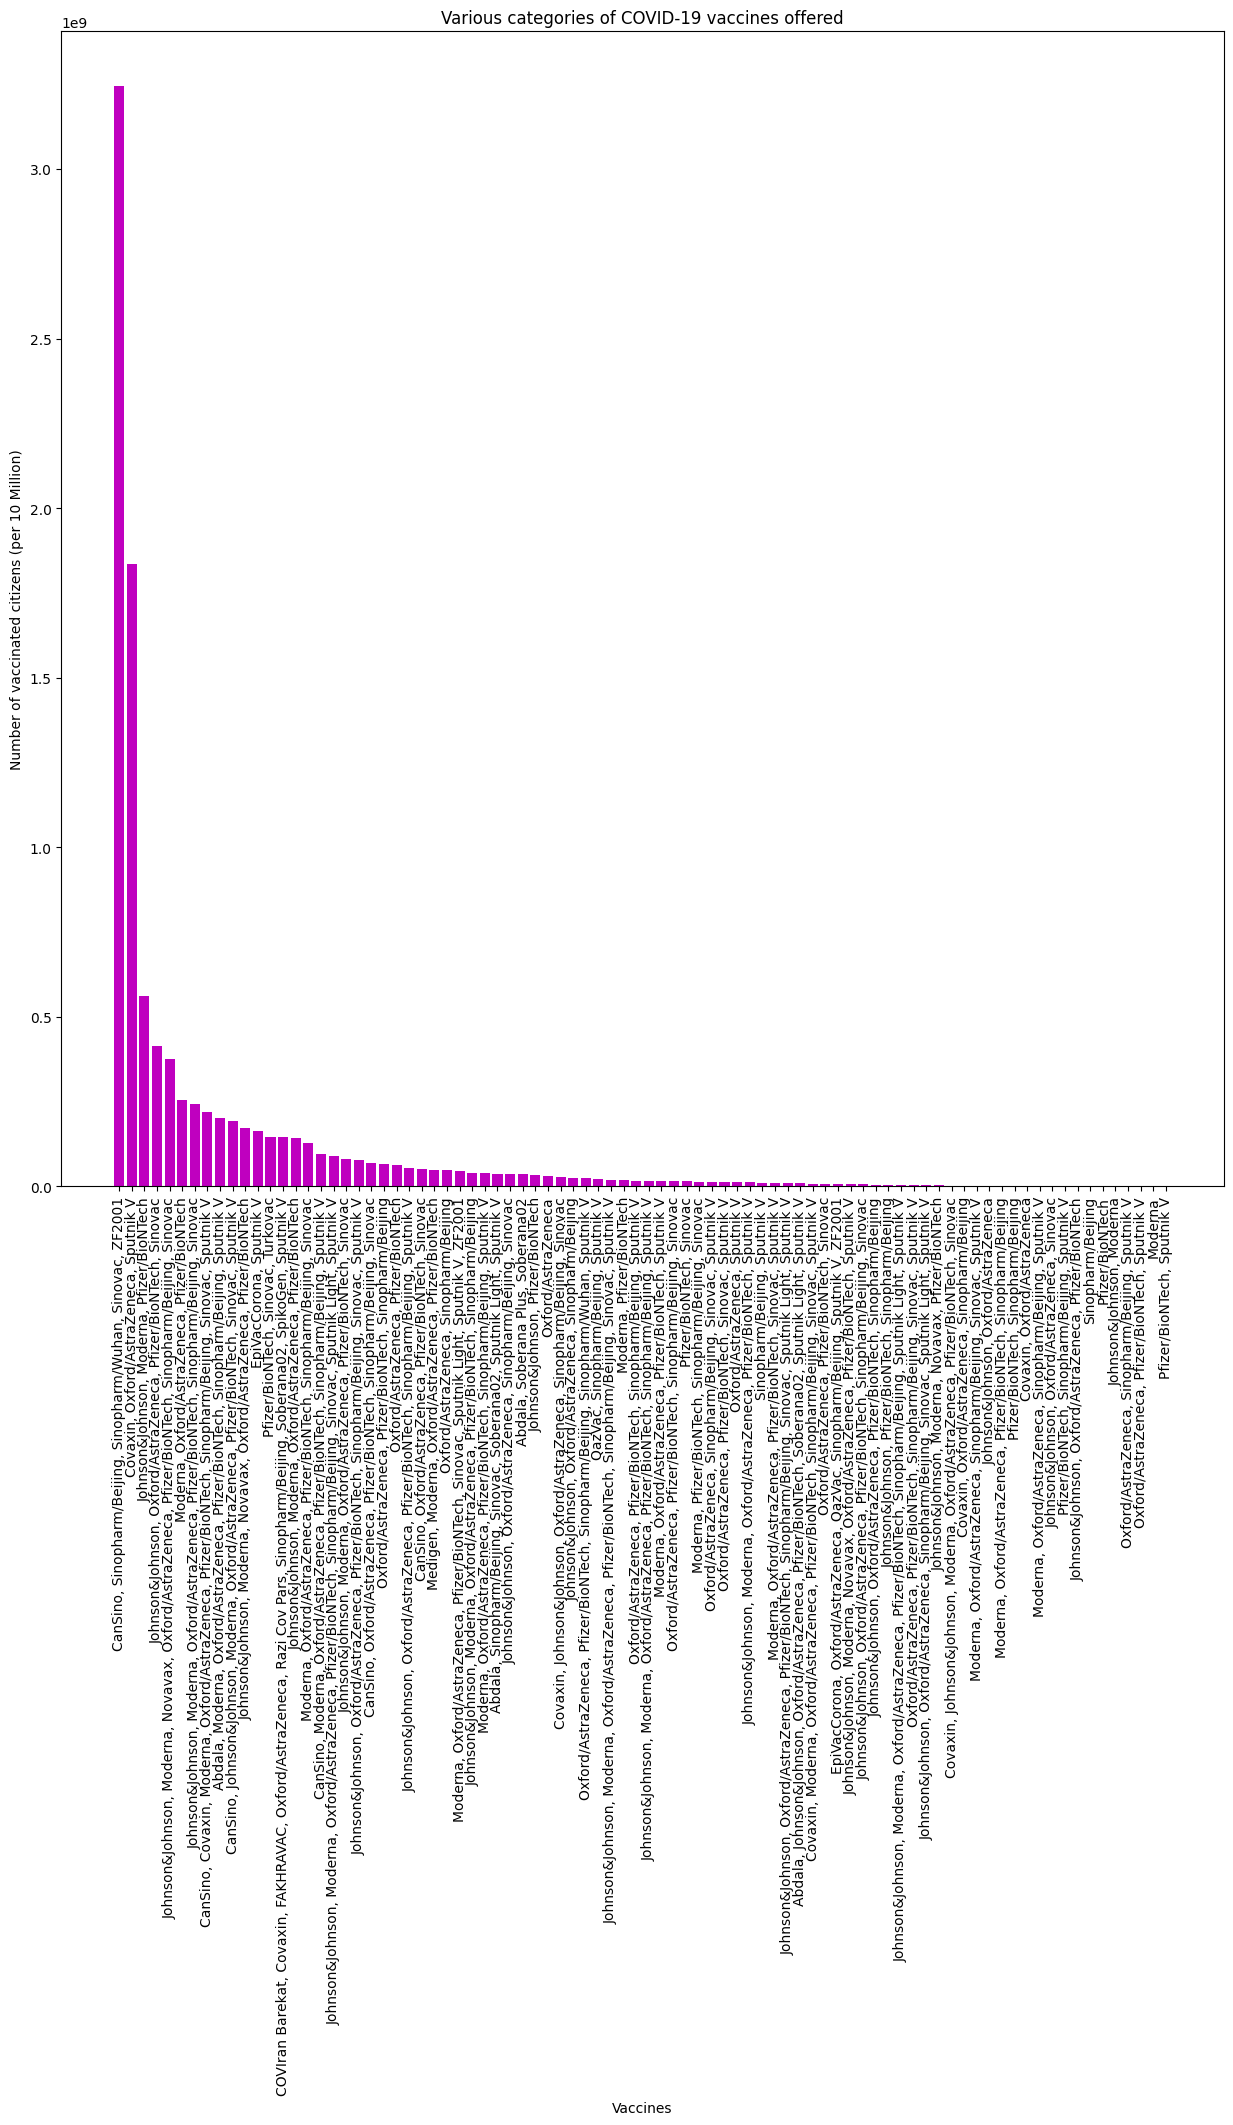

In [62]:
plt.figure(figsize=(15,15))
grp = ['Country', 'TotalVaccinations', 'IsoCode', 'Vaccines']
vacc_no = df2[grp].groupby('Vaccines').max().sort_values('TotalVaccinations', ascending=False).dropna(subset=['TotalVaccinations'])

plt.bar(vacc_no.index, vacc_no.TotalVaccinations , color ='m')
plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show()

**8.Percentage of use of different types of vaccines.**


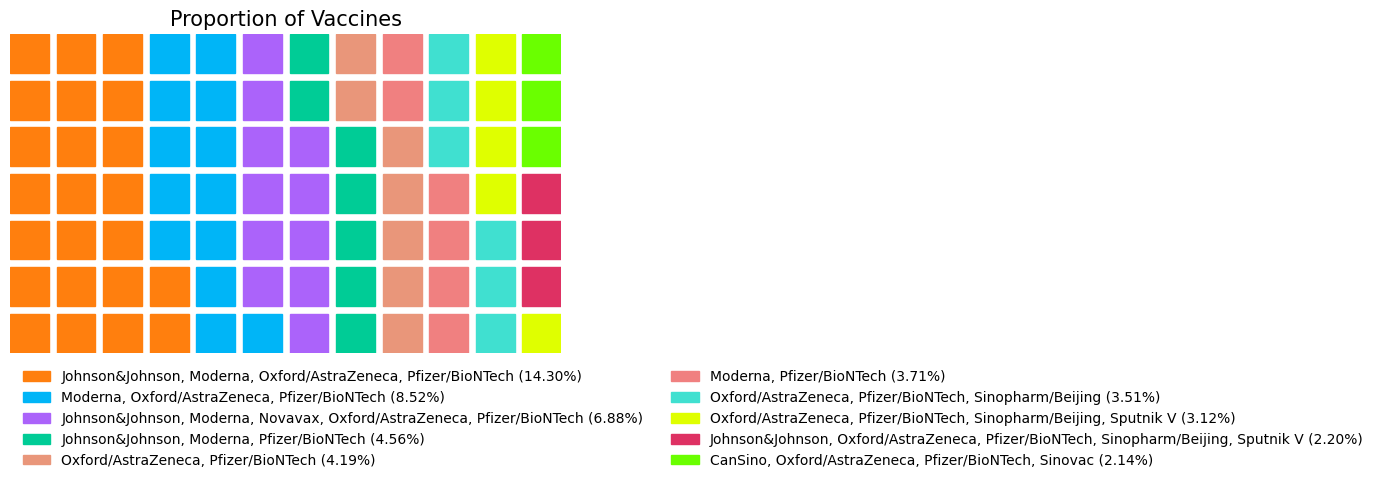

In [45]:
data = dict(df2['Vaccines'].value_counts(normalize = True).nlargest(10)*100)

vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac']

fig = plt.figure(
    rows=7,
    columns=12,
    FigureClass = Waffle,
    values = data,
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

**9.Total Vaccinations per country grouped by Vaccines.**

In [46]:
tvc=df2.groupby(['Country','Vaccines'])['TotalVaccinations'].max().reset_index()
tvc.head(5)

,Country,Vaccines,TotalVaccinations
0,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",5751015
1,Albania,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2754244
2,Algeria,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",13704895
3,Andorra,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",151997
4,Angola,Oxford/AstraZeneca,17535411


In [50]:
fig = px.treemap(tvc, path=['Country','Vaccines'],
                 values = 'TotalVaccinations', title="Total vaccination per country grouped by vaccines")
fig.update_traces(root_color='lightgray')
#fig.update_layout(margin=dict(t=50,l=25,r=25,b=25))
fig.show()

**10.People vaccinated per country, grouped by vaccine scheme**

In [51]:
CountryVaccine = df2.groupby(["Country", "IsoCode", "Vaccines"])['TotalVaccinations',
                                                                       'TotalVaccinationsPerHundred',
                                                                      'DailyVaccinations',
                                                                      'DailyVaccinationsPerMillion',
                                                                      'PeopleVaccinated',
                                                                      'PeopleVaccinatedPerHundred',
                                                                      'PeopleFullyVaccinated',
                                                                      'PeopleFullyVaccinatedPerHundred'
                                                                      ].max().reset_index()

CountryVaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations",
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           "People fully vaccinated", "People fully vaccinated percent"]

In [52]:

fig = px.treemap(CountryVaccine, path = ['Vaccines', 'Country'], values = 'People vaccinated',
                title="People vaccinated per country, grouped by vaccine scheme")
fig.show()

**11.Daily COVID-19 vaccine doses administered per million people.**

In [53]:
dvpm = df2.groupby("Country")["DailyVaccinationsPerMillion"].max().sort_values(ascending= False).head(15)
dvpm.reset_index()

,Country,DailyVaccinationsPerMillion
0,Bhutan,117497
1,Isle of Man,70706
2,Botswana,55891
3,Niue,53903
4,Falkland Islands,53571
5,Nauru,51504
6,Nicaragua,46446
7,Cook Islands,46210
8,Mongolia,37684
9,Gibraltar,31700


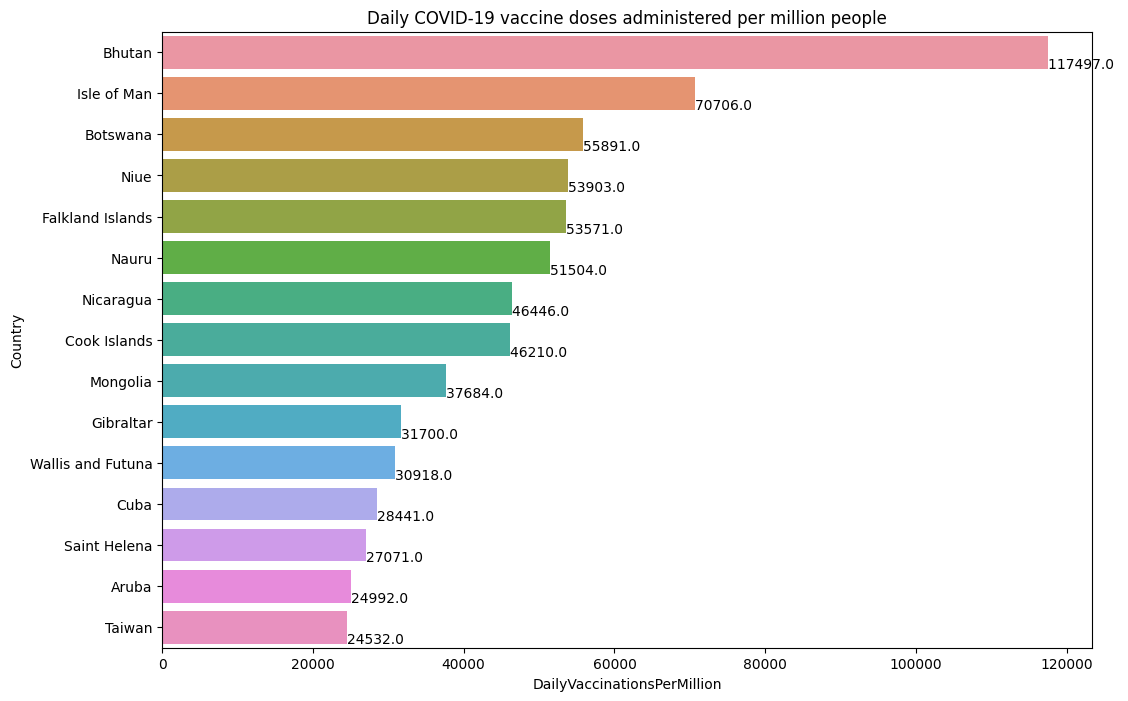

In [54]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=dvpm, y=dvpm.index )
plt.xlabel("DailyVaccinationsPerMillion")
plt.ylabel("Country")
plt.title("Daily COVID-19 vaccine doses administered per million people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()

    plt.text(width + x, height + y, '{:.1f} '.format(width))

**12.How many people daily vaccinated in India**

In [55]:
indiadf = df2[df2['Country'] == 'India']
indiadf

,Country,IsoCode,Date,TotalVaccinations,PeopleVaccinated,PeopleFullyVaccinated,DailyVaccinationsRaw,DailyVaccinations,TotalVaccinationsPerHundred,PeopleVaccinatedPerHundred,PeopleFullyVaccinatedPerHundred,DailyVaccinationsPerMillion,Vaccines,SourceName,SourceWebsite
35372,India,IND,2021-01-15,0,0,0,0,0,0,0,0,0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35373,India,IND,2021-01-16,191181,191181,0,191181,191181,0,0,0,137,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35374,India,IND,2021-01-17,224301,224301,0,33120,112150,0,0,0,80,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35375,India,IND,2021-01-18,454049,454049,0,229748,151350,0,0,0,109,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35376,India,IND,2021-01-19,674835,674835,0,220786,168709,0,0,0,121,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,India,IND,2022-03-25,1826265830,980435665,824764568,1997100,2433734,131,70,59,1747,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35807,India,IND,2022-03-26,1830285290,982687842,826360688,4019460,2830351,131,71,59,2031,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35808,India,IND,2022-03-27,1831347741,983190780,826884564,1062451,2851859,131,71,59,2047,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35809,India,IND,2022-03-28,1833040014,984051283,827610878,1692273,2736644,132,71,59,1964,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/


In [56]:
indiadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 35372 to 35810
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          428 non-null    object        
 1   IsoCode                          428 non-null    object        
 2   Date                             428 non-null    datetime64[ns]
 3   TotalVaccinations                428 non-null    float64       
 4   PeopleVaccinated                 428 non-null    float64       
 5   PeopleFullyVaccinated            428 non-null    float64       
 6   DailyVaccinationsRaw             428 non-null    float64       
 7   DailyVaccinations                428 non-null    float64       
 8   TotalVaccinationsPerHundred      428 non-null    float64       
 9   PeopleVaccinatedPerHundred       428 non-null    float64       
 10  PeopleFullyVaccinatedPerHundred  428 non-null    float64

In [57]:
indiadf.DailyVaccinationsRaw.sum()

1765216398.0

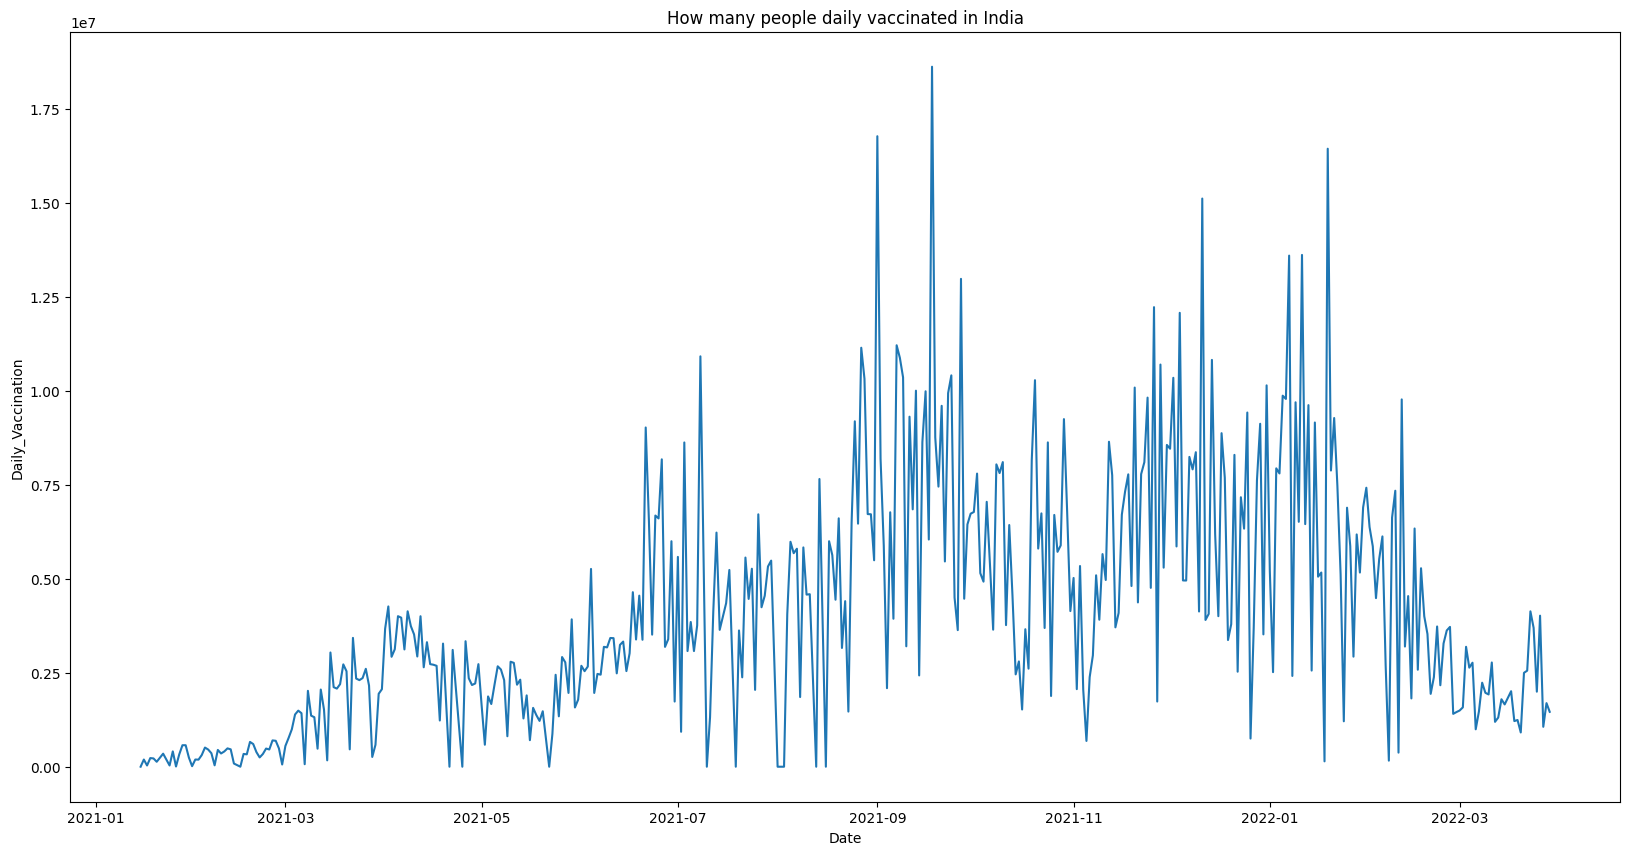

In [58]:
plt.figure(figsize=(20,10))
sns.lineplot(x=indiadf.Date, y=indiadf.DailyVaccinationsRaw)
plt.xlabel("Date")
plt.ylabel("Daily_Vaccination")
plt.title('How many people daily vaccinated in India');

**13.How many people take at least one dose of vaccine in India?**

In [59]:
total_vaccinated_ind = indiadf.TotalVaccinations.max()/1000000
print("{0:.2f} M people take at least one dose of vaccine in India.".format(total_vaccinated_ind))

1834.50 M people take at least one dose of vaccine in India.



**14. How many people total fully vaccinated in India?**

In [60]:
fully_vaccinated_ind = indiadf.PeopleFullyVaccinated.max()/1000000
print("Total fully vaccinated people in India: {0:.2f}M".format(fully_vaccinated_ind))

Total fully vaccinated people in India: 828.23M


Number of fully vaccinated citizens in India is 205.67M as per current data although the total number is incrementing daily.